In [ ]:
!unzip text_adventure_games.zip

In [ ]:
!apt install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from text_adventure_games import games, parsing, actions, things, blocks, viz

In [ ]:
# Locations
launchsite = things.Location(
    "Launch Site",
    "You are at the Mars launch site. Your rocket stands nearby, ready for departure."
)
crater = things.Location(
    "Crater",
    "You are in a large crater. The rocky Martian landscape stretches out around you."
)
mine = things.Location(
    "Mine",
    "You are in a dark, cavernous mine. Strange minerals glitter on the walls."
)

# Map of Locations
launchsite.add_connection("east", crater)
crater.add_connection("west", launchsite)
crater.add_connection("south", mine)
mine.add_connection("north", crater)

In [ ]:
# Items
map_item = things.Item(
    "map",
    "a Martian map",
    "A MAP SHOWING KEY LOCATIONS ON MARS."
)
launchsite.add_item(map_item)

key = things.Item(
    "key",
    "a rusty key",
    "AN OLD KEY THAT MIGHT UNLOCK SOMETHING."
)
crater.add_item(key)

healer = things.Item(
    "healer",
    "the Healer element",
    "A GLOWING SUBSTANCE THAT CAN SAVE EARTH."
)
mine.add_item(healer)

In [ ]:
# Player
player = things.Character(
    name="Astronaut",
    description="A brave astronaut on a mission to save Earth.",
    persona="I must find the Healer element and return to Earth!",
)

In [ ]:
class LaunchRocket(actions.Action):
    ACTION_NAME = "launch rocket"
    ACTION_DESCRIPTION = "Launch the rocket to return to Earth"
    ACTION_ALIASES = ["blast off", "return to earth"]

    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.game.player

    def check_preconditions(self) -> bool:
        if self.character.location.name != "Launch Site":
            self.game.parser.fail("You need to be at the Launch Site to launch the rocket.")
            return False
        if "healer" not in self.character.inventory:
            self.game.parser.fail("You need the Healer element to save Earth!")
            return False
        return True

    def apply_effects(self):
        self.game.parser.ok("You launch the rocket with the Healer element on board. Earth is saved! You win!")
        self.character.set_property("has_won", True)

In [ ]:
# Blocks
class MineLock(blocks.Block):
    def __init__(self, location: things.Location, game: games.Game):
        super().__init__("The mine entrance is locked", "You need a key to enter the mine.")
        self.location = location
        self.game = game

    def is_blocked(self) -> bool:
        player = self.game.player
        if "key" not in player.inventory:
            return True
        return False

# Add the MineLock to the crater's south exit
mine_lock = MineLock(crater, None)  # We don't have a separate door item
crater.add_block("south", mine_lock)

In [ ]:
class EscapeMars(games.Game):
    def __init__(self, start_at: things.Location, player: things.Character, custom_actions=None):
        super().__init__(start_at, player, custom_actions=custom_actions)

        # Add the MineLock to the crater's south exit
        crater = self.locations["Crater"]
        mine_lock = MineLock(crater, self)
        crater.add_block("south", mine_lock)

    def is_won(self) -> bool:
        has_won = self.player.get_property("has_won")
        return has_won is True

In [ ]:
custom_actions = [LaunchRocket]
game = EscapeMars(launchsite, player, custom_actions=custom_actions)

# Start the game
game.game_loop()

You are at the Mars launch site. Your rocket stands nearby, ready for departure.
Exits:
East to Crater

You see:
 * a Martian map



> take map
Astronaut got the map.

> go east
You are in a large crater. The rocky Martian landscape stretches out around you.
Exits:
West to Launch Site
South to Mine

You see:
 * a rusty key



> take key
Astronaut got the key.

> go south
You are in a dark, cavernous mine. Strange minerals glitter on the walls.
Exits:
North to Crater

You see:
 * the Healer element



> take healer
Astronaut got the healer.

> go north
You are in a large crater. The rocky Martian landscape stretches out around you.
Exits:
West to Launch Site
South to Mine





> go west
You are at the Mars launch site. Your rocket stands nearby, ready for departure.
Exits:
East to Crater





> launch rocket
You launch the rocket with the Healer element on board. Earth is saved! You win!


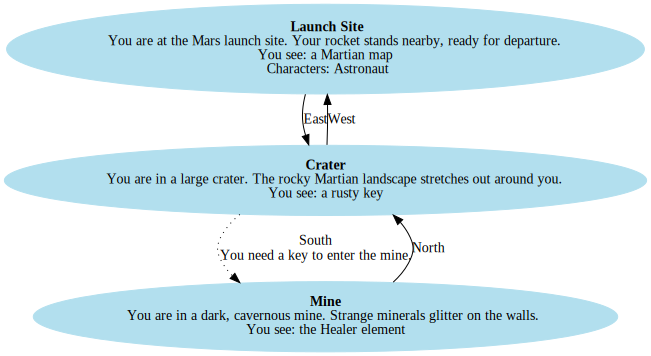

In [ ]:
from text_adventure_games.viz import Visualizer
viz = Visualizer(game)
graph = viz.visualize()
graph

In [ ]:
graph.render("escape_mars_map", format="svg", cleanup=True)

'escape_mars_map.svg'